In [19]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

### Time

In [17]:
csv_path = "../data/results/coco-time_key-margin=0_dataset-size=10000.csv"
df = pd.read_csv(csv_path)

In [18]:
df["Time (s)"] = df["Time (s)"].apply(ast.literal_eval)
df["Average Time (ms)"] = df["Time (s)"].apply(lambda x: np.round(np.mean(x) * 1000, 3))
df["Std Time (ms)"] = df["Time (s)"].apply(lambda x: np.round(np.std(x) * 1000, 3))
df.to_csv(csv_path, index=False)

### precision @k

In [29]:
csv_path = "../data/results/coco-precision@k_key-margin=0_dataset-size=10000.csv"
precision_table1 = pd.read_csv(csv_path)
csv_path = "../data/results/precision@k_key-margin=0_dataset-size=2000.csv"
precision_table2 = pd.read_csv(csv_path)

In [ ]:
labels = [
    "PCA=2",
    "PCA=4",
    "PCA=16",
    "PCA=64",
    "PCA=256",
    "PQ=8x32",
    "PQ=16x32",
    "PQ=32x32",
    "PQ=64x32",
    "PCA=64\nPQ=8x32",
    "PCA=64\nPQ=16x32",
    "PCA=64\nPQ=64x32",
    "Reference",
]

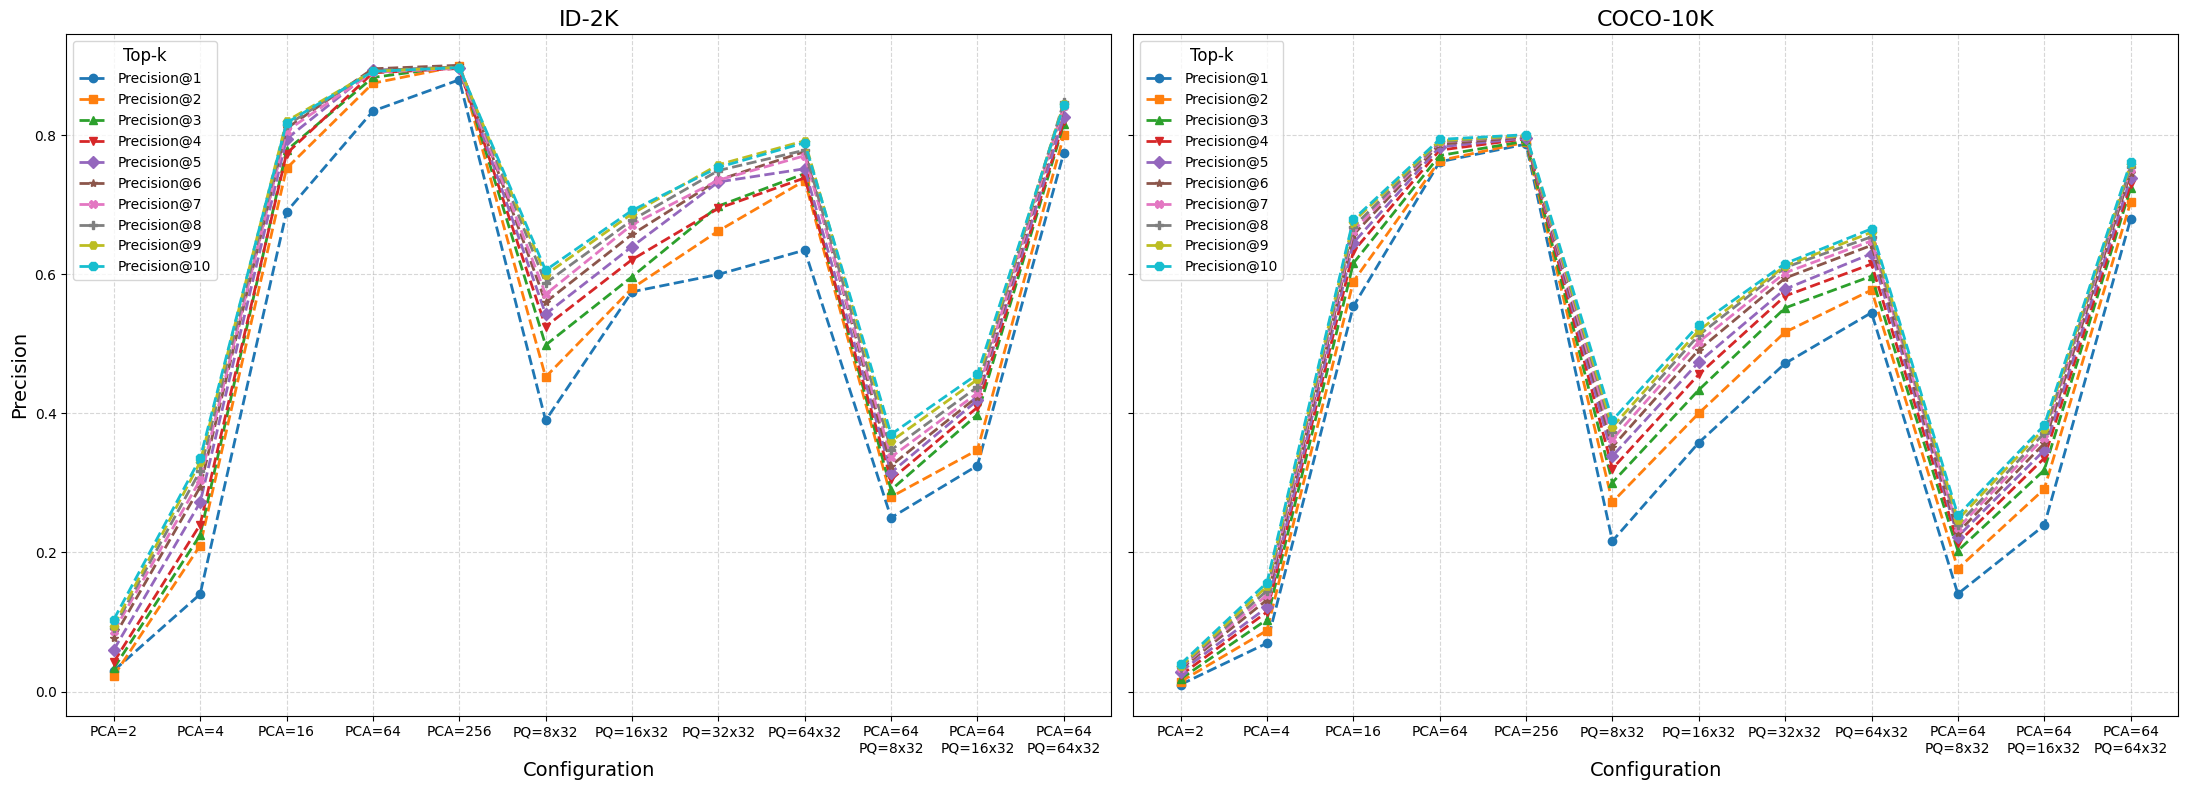

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(22, 8), sharey=True)
markers = ["o", "s", "^", "v", "D", "*", "X", "P", "H", "8"]

# First dataset plot
for k in range(1, 11):
    precision_values = precision_table2[f"Precision@{k}"]
    axes[0].plot(
        labels[:-1],
        precision_values,
        marker=markers[k - 1],
        linestyle="--",
        linewidth=2,
        label=f"Precision@{k}",
    )

axes[0].set_title("ID-2K", fontsize=16)
axes[0].set_xlabel("Configuration", fontsize=14)
axes[0].set_ylabel("Precision", fontsize=14)
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].legend(title="Top-k", fontsize=10, title_fontsize=12)

# Second dataset plot
for k in range(1, 11):
    precision_values = precision_table1[f"Precision@{k}"]
    axes[1].plot(
        labels[:-1],
        precision_values,
        marker=markers[k - 1],
        linestyle="--",
        linewidth=2,
        label=f"Precision@{k}",
    )

axes[1].set_title("COCO-10K", fontsize=16)
axes[1].set_xlabel("Configuration", fontsize=14)
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].legend(title="Top-k", fontsize=10, title_fontsize=12)

# Set same y-axis limits
y_min = min(axes[0].get_ylim()[0], axes[1].get_ylim()[0])
y_max = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

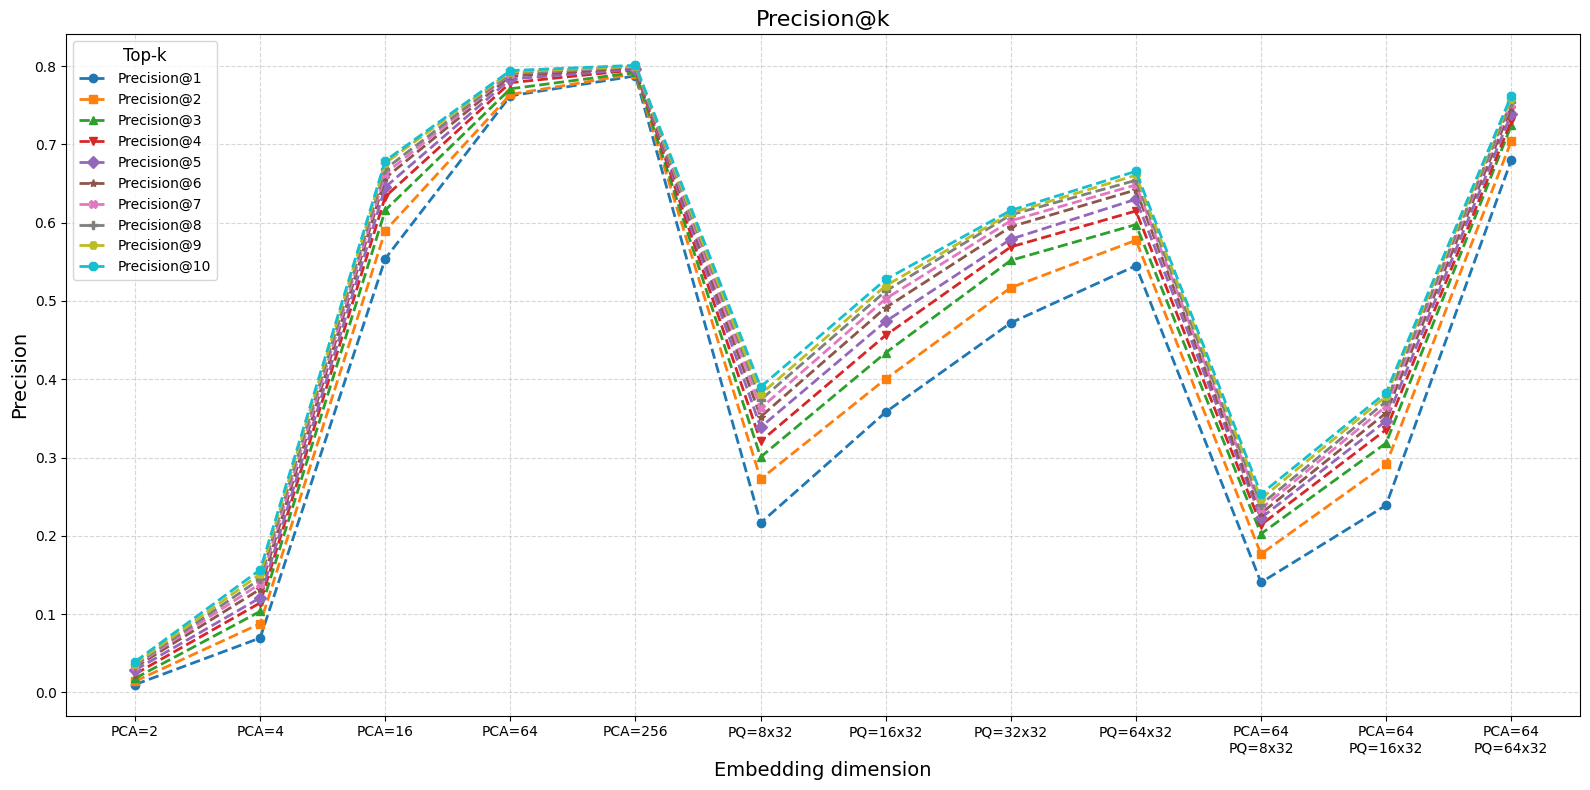

In [ ]:
plt.figure(figsize=(16, 8))
markers = ["o", "s", "^", "v", "D", "*", "X", "P", "H", "8"]

for k in range(1, 11):
    precision_values = precision_table[f"Precision@{k}"]
    plt.plot(
        labels[:-1],
        precision_values,
        marker=markers[k - 1],
        linestyle="--",
        linewidth=2,
        label=f"Precision@{k}",
    )

# Plot settings
plt.title("Precision@k", fontsize=16)
plt.xlabel("Embedding dimension", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Top-k", fontsize=10, title_fontsize=12)
plt.tight_layout()

plt.show()